In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.9, 1.4],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2],
])
df = pd.DataFrame(data, columns=["X", "Y", "Z"])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.9,1.4
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [ ]:
#Standardization using pandas
standardized_data = (df - df.mean()) / df.std()

In [ ]:
#covariance matrix
cov_matrix = np.cov(standardized_data.T)

In [ ]:
#eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [ ]:
#sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]

In [ ]:
#select top 2 eigenvectors
eig_vecs_subset = sorted_eig_vecs[:, :2]
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])

In [ ]:
print("/nReduced Data (after PCA):\n", reduced_df)

/nReduced Data (after PCA):
         PC1       PC2
0  1.005875  0.362567
1 -2.504755 -0.279315
2  1.328515 -0.334950
3  1.112428 -0.645509
4  2.366240  0.385956
5  1.380089 -0.168988
6 -0.194563  0.453838
7 -1.778640 -0.040501
8 -0.663062 -0.012460
9 -2.052126  0.279363


Text(0, 0.5, 'Principal Component 2')

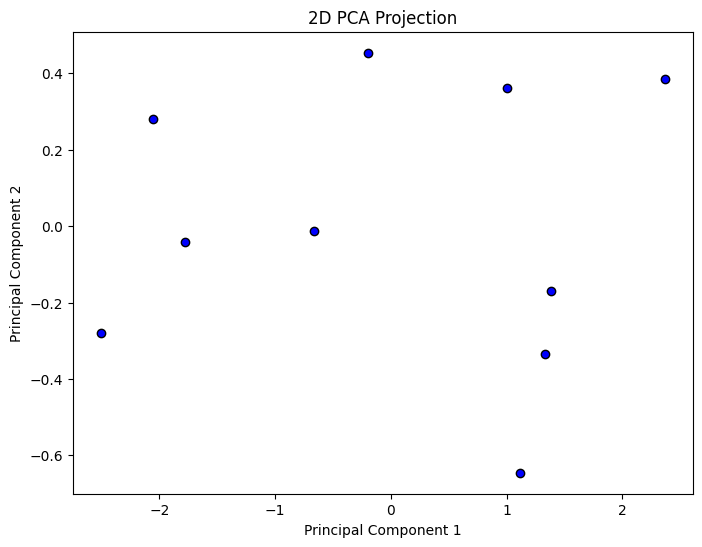

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df["PC1"], reduced_df["PC2"], color = "blue", edgecolor = "k")
plt.title("2D PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")